Custom KNN Accuracy Results:
K = 3 → Accuracy = 0.99
K = 5 → Accuracy = 0.99
K = 10 → Accuracy = 0.98

Sklearn KNN Accuracy:
K = 3 → Accuracy = 0.99


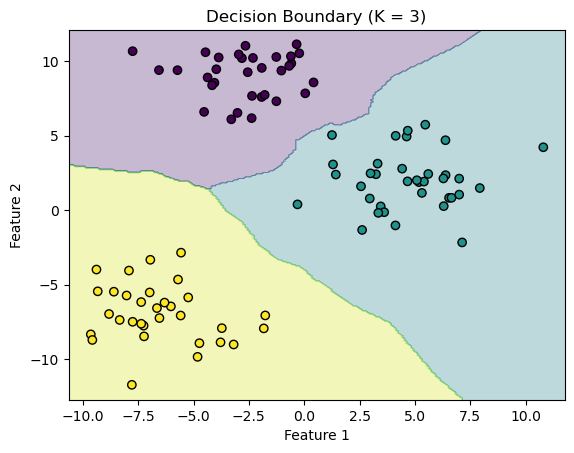


Summary:
Custom KNN Accuracies: {3: 0.9866666666666667, 5: 0.9866666666666667, 10: 0.98}
Best K Value: 3
Sklearn KNN Accuracy: 0.99


In [1]:
# KNN FROM SCRATCH PROJECT
# Author: Student
# Description: Implementing and Evaluating KNN from Scratch using NumPy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --------------------------------------------------
# 1. Generate Synthetic Dataset
# --------------------------------------------------
X, y = make_blobs(
    n_samples=500,
    centers=3,
    n_features=2,
    cluster_std=2.0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --------------------------------------------------
# 2. KNN From Scratch (Using NumPy Only)
# --------------------------------------------------
class KNNFromScratch:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]
            most_common = np.bincount(k_labels).argmax()
            predictions.append(most_common)
        return np.array(predictions)

# --------------------------------------------------
# 3. Evaluate Custom KNN for K = 3, 5, 10
# --------------------------------------------------
k_values = [3, 5, 10]
custom_accuracies = {}

print("Custom KNN Accuracy Results:")
for k in k_values:
    knn = KNNFromScratch(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    custom_accuracies[k] = acc
    print(f"K = {k} → Accuracy = {acc:.2f}")

best_k = max(custom_accuracies, key=custom_accuracies.get)

# --------------------------------------------------
# 4. Sklearn KNN Comparison
# --------------------------------------------------
sk_knn = KNeighborsClassifier(n_neighbors=best_k)
sk_knn.fit(X_train, y_train)
sk_pred = sk_knn.predict(X_test)
sk_acc = accuracy_score(y_test, sk_pred)

print("\nSklearn KNN Accuracy:")
print(f"K = {best_k} → Accuracy = {sk_acc:.2f}")

# --------------------------------------------------
# 5. Decision Boundary Visualization
# --------------------------------------------------
def plot_decision_boundary(model, X, y, k):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.1),
        np.arange(y_min, y_max, 0.1)
    )

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(f"Decision Boundary (K = {k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

best_knn = KNNFromScratch(k=best_k)
best_knn.fit(X_train, y_train)

plot_decision_boundary(best_knn, X_train[:100], y_train[:100], best_k)

# --------------------------------------------------
# 6. Summary Output
# --------------------------------------------------
print("\nSummary:")
print("Custom KNN Accuracies:", custom_accuracies)
print(f"Best K Value: {best_k}")
print(f"Sklearn KNN Accuracy: {sk_acc:.2f}")

